### 머신러닝 종류
1. 지도학습
    - 문제(X)와 답(y)가 주어진 상태에서 학습
    - 분류, 회귀로 나뉨
        - 분류: 정답 데이터(y)의 형태가 범주형 데이터일 때
        - 회귀: 정답 데이터(y)의 형태가 연속형 데이터일 때

2. 비지도학습
    - 문제(X)에 대해서만 주어진 상태에서 학습
    - 데이터의 숨겨진 특성, 구조, 패턴을 파악 -> 클러스터링(군집화)

3. 강화학습
    - 완전한 답을 제공하지 않음
    - 더 큰 보상을 얻을 수 있는 방향으로 학습을 진행
    - ex.알파고

### 머신러닝 단계
1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. EDA(탐색적 데이터 분석)
5. 모델 선택, 하이퍼파라미터 조정
6. 모델 학습
7. 모델 평가

1. 문제정의
- 500명의 키, 몸무게 데이터를 통해서 비만도를 판별하는 모델 생성
- 분류모델 활용! -> 6가지의 class로 분류하는 판별기를 만들어 보자!

In [1]:
# 필요한 라이브러리 불러오기! 
import pandas as pd
import matplotlib.pyplot as plt

2. 데이터 수집
- csv 파일 불러오기

In [3]:
data = pd.read_csv('data/bmi_500.csv', index_col='Label')
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


3. 데이터 전처리
- 결측치 대체 or 제거
- 이상치 대체 or 제거
- 변수 처리
- 데이터 split(train set과 test set을 분리)

In [4]:
# data의 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


4. EDA(탐색적 데이터 분석)
- 데이터의 특성 확인, 파악
- 기술통계량(요약본), 데이터의 분포 파악, 시각화

,count,unique,top,freq
Gender,500,2,Female,255


In [7]:
# 기술통계량(요약본) 확인
# 수치형 데이터에 대해 요약본 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,500.0,169.944,16.375261,140.0,156.0,170.5,184.0,199.0
Weight,500.0,106.000,32.382607,50.0,80.0,106.0,136.0,160.0


In [9]:
# object형에 대해 기술통계량 확인
data.describe(include='object').T

,count,unique,top,freq
Gender,500,2,Female,255


In [10]:
# 정답데이터 확인하기(label)
data.index.unique()
# 총 6ea의 클래스를 가짐
# 다중분류: 6가지의 클래스 중에서 1개의 정답을 예측

# Extreme Obesity: 고도비만
# Obesity: 비만
# Overweight: 과체중
# Normal: 정상
# Weak: 저체중
# Extremely Weak: 심한 저체중

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

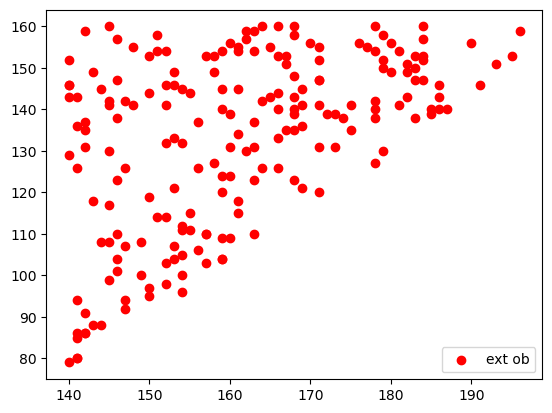

In [23]:
# 시각화 (bmi 레이블별 분표 현황 시각화)
# 산점도(scatter)
# 고도비만에 대한 산점도 그려보기
EO = data.loc['Extreme Obesity']

EO["Height"]
EO["Weight"]
plt.scatter(EO['Height'],EO['Weight'], color="red", label='ext ob')
plt.legend()
plt.show()

In [ ]:
# 같은 작업을 6번 동일하게 진행해서, 모든 클래스에 대한 산점도 그려보기!
# 함수 활용!

In [21]:
Ob = data.loc['Obesity']
OW = data.loc['Overweight']
Nor = data.loc['Normal']
Weak = data.loc['Weak']
EW = data.loc['Extremely Weak']

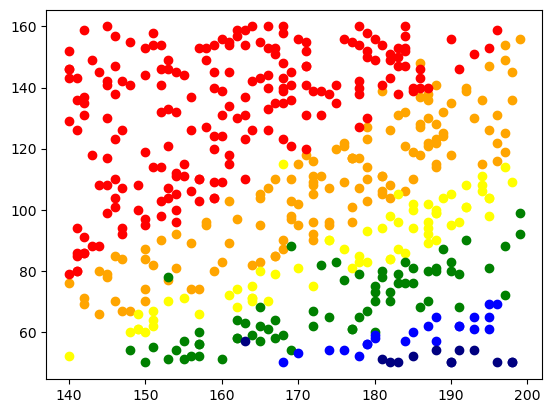

In [26]:
plt.scatter(Ob['Height'],Ob['Weight'], color="orange", label='over weight')
plt.scatter(OW['Height'],OW['Weight'], color="yellow", label='ext ob')
plt.scatter(Nor['Height'],Nor['Weight'], color="green", label='ext ob')
plt.scatter(Weak['Height'],Weak['Weight'], color="blue", label='ext ob')
plt.scatter(EW['Height'],EW['Weight'], color="navy", label='ext ob')
plt.scatter(EO['Height'],EO['Weight'], color="red", label='ext ob')

In [36]:
# 함수 활용!
def graph_draw(label, c):
    class_bmi = data.loc[label]
    plt.scatter(class_bmi['Height'],class_bmi['Weight'], color=c, label=label)

In [28]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

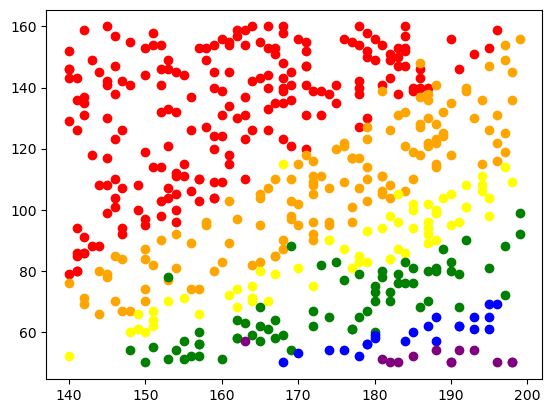

In [37]:
# 함수 호출하기
graph_draw('Extreme Obesity','red')
graph_draw('Obesity','orange')
graph_draw('Overweight','yellow')
graph_draw('Normal','green')
graph_draw('Weak','blue')
graph_draw('Extremely Weak','purple')

plt.show()

In [41]:
# 데이터 분리
# 문제 데이터(X): Height, Weight
# 정답 데이터(y) : label
X=data[["Height","Weight"]] # X(문제) 대문자! -> 2차원
y=data.index

In [43]:
X.shape, y.shape

((500, 2), (500,))

In [52]:
# train, text 분리
# 한정적인 데이터 내에서 학습 + 평가까지 해야되기 때문에
# train: 70%, test: 30%
X_train = X.iloc[0:350]
y_train = y[0:350]

X_test = X.iloc[350:]
y_test = y[350:]

5. 모델 선택, 하이퍼파라미터 조정
- KNN 모델 (실습용 모델)

In [46]:
# 머신러닝 패키지 불러오기
from sklearn.neighbors import KNeighborsClassifier # KNN 분류모델
from sklearn.metrics import accuracy_score # 정확도 측정 도구

6. 모델 학습
- fit(): 모델 학습

In [48]:
# 모델 객체 생성(모델 초기화)
knn= KNeighborsClassifier()
# 모델 생성만 한 것

In [53]:
# 모델 학습
# fit(훈련용 문제, 훈련용 답)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
# 모델 예측
# predict(테스트용 문제): 예측을 수행
pre = knn.predict(X_test)

7. 모델 평가

In [55]:
# acc(실제값, 예측값)
accuracy_score(y_test, pre)

0.9066666666666666